# Exploratory Data Analysis & Intro

## Goal 
    1. Investigate top-paying roles and skills in the data science industry.
    2. Use Python to explore a real-live dataset on job postings.
    3. For job-seekers: use these insights to help find the best job opportunities.

## Final Deliverables:

- Create Jupyter Notebooks (showcasing core skills in Python)
- Create a summary page (via Readme.md) capturing your findings.
- Share this project via Github

In [ ]:
%pip install -U datasets
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
#df= pd.read_csv('https://lukedb.co/python_csv')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

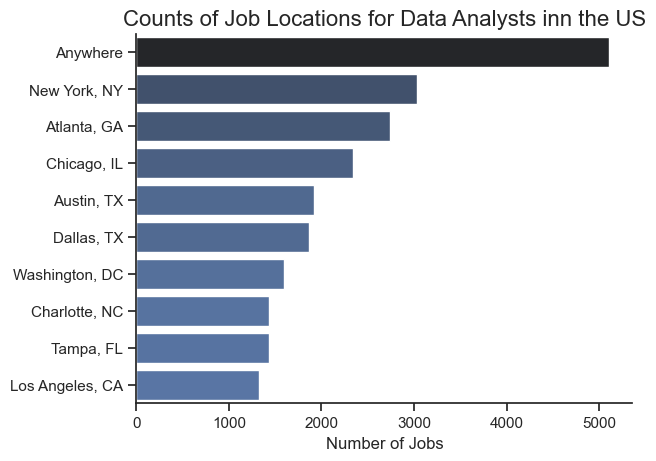

In [7]:
country1='United States'
job1='Data Analyst'
df_us=df[(df['job_country']==country1)& (df['job_title_short']==job1)]
df_plot_us = df_us['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot_us, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analysts inn the US', fontsize=16)
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


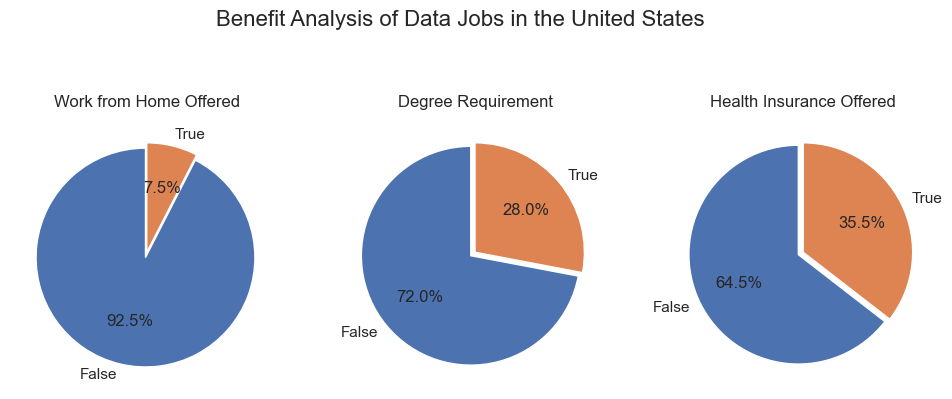

In [8]:
#rewrite the above with a for loop
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12,5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_us[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90, explode = (0.05, 0))
    ax[i].set_title(title)

plt.suptitle(f'Benefit Analysis of Data Jobs in the {country1}', fontsize=16)
plt.show()

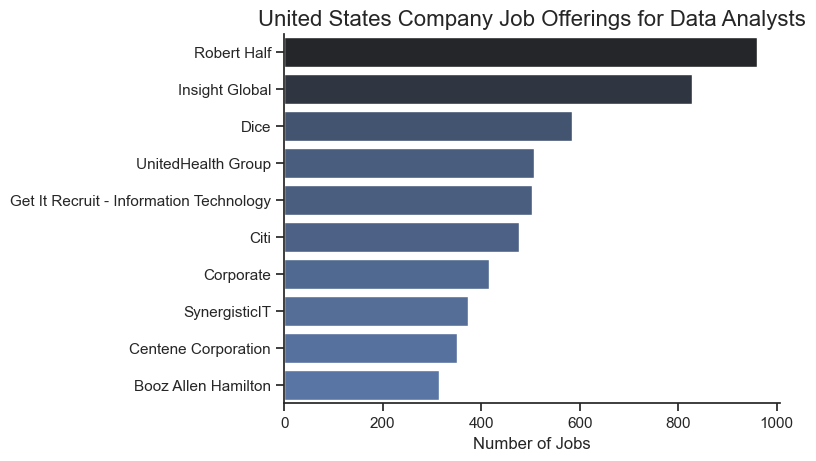

In [9]:
country2='United States'
job2='Data Analyst'
df_cont_company=df[(df['job_country']==country2) & (df['job_title_short']==job2)]
df_company = df_cont_company['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_company, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title(f'{country2} Company Job Offerings for {job2}s', fontsize=16)
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()